In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import yfinance as yf

tlt = yf.download("TLT", start = "2002-01-01", end = "2022-11-14")

[*********************100%***********************]  1 of 1 completed


In [2]:
# First, we compute the log returns.
tlt["log_return"] = np.log(tlt["Adj Close"] / tlt["Adj Close"].shift(1))

#Then we’ll add a column for the calendar day of the month (1 – 31) and a column for the year.
tlt["day_of_month"] = tlt.index.day
tlt["year"] = tlt.index.year

tlt

,Open,High,Low,Close,Adj Close,Volume,log_return,day_of_month,year
Date,,,,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,41.434555,6100,NaN,30,2002
2002-07-31,81.949997,82.800003,81.900002,82.529999,41.947914,29400,0.012314,31,2002
2002-08-01,82.540001,83.019997,82.540001,83.000000,42.186810,25000,0.005679,1,2002
2002-08-02,83.160004,84.099998,82.879997,83.849998,42.618843,52800,0.010189,2,2002
2002-08-05,84.040001,84.440002,83.849998,84.220001,42.806896,61100,0.004403,5,2002
...,...,...,...,...,...,...,...,...,...
2022-11-07,94.800003,94.860001,93.239998,93.279999,93.279999,14522800,-0.010027,7,2022
2022-11-08,93.800003,94.959999,93.769997,94.300003,94.300003,20360600,0.010876,8,2022
2022-11-09,93.820000,95.019997,93.690002,94.610001,94.610001,15637500,0.003282,9,2022


<AxesSubplot: title={'center': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

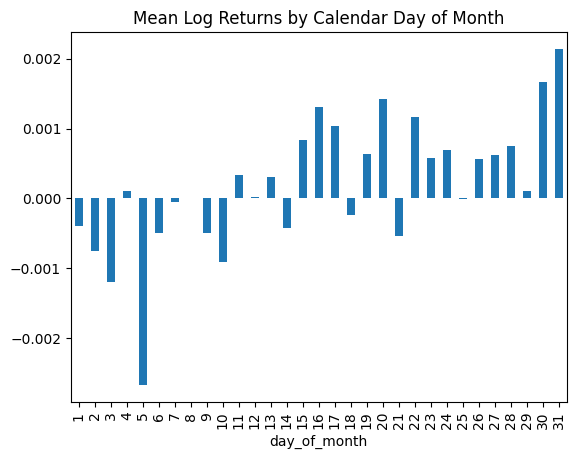

In [3]:
grouped_by_day = tlt.groupby("day_of_month").log_return.mean()

grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

In [4]:
tlt["first_week_returns"] = 0.0
tlt.loc[tlt.day_of_month <= 7, "first_week_returns"] = tlt[
    tlt.day_of_month <= 7
].log_return

tlt["last_week_returns"] = 0.0
tlt.loc[tlt.day_of_month >= 23, "last_week_returns"] = tlt[
    tlt.day_of_month >= 23
].log_return

tlt["last_week_less_first_week"] = tlt.last_week_returns - tlt.first_week_returns

<AxesSubplot: title={'center': 'Mean Log Strategy Returns by Year'}, xlabel='year'>

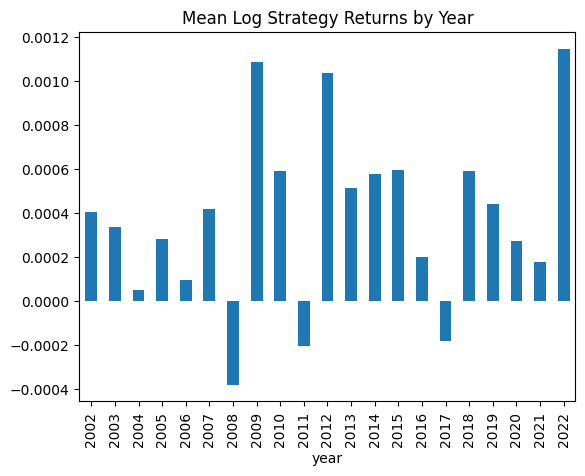

In [5]:
(
    tlt.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title = "Mean Log Strategy Returns by Year")
)

<AxesSubplot: title={'center': 'Cumulative Sum of Returns By Year'}, xlabel='year'>

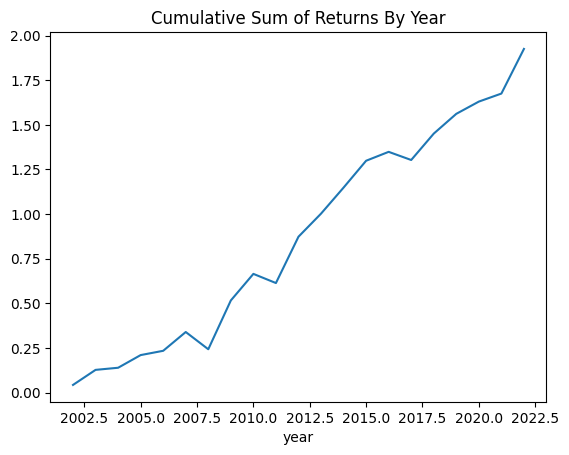

In [6]:
(
    tlt.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title = "Cumulative Sum of Returns By Year")
)

<AxesSubplot: title={'center': 'Cumulative Sum of Returns By Day'}, xlabel='Date'>

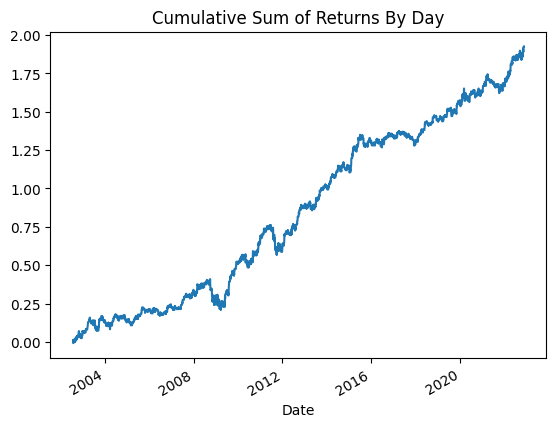

In [7]:
tlt.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")